# Домашнее задание к лекции «Базовые понятия статистики»

In [27]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]

pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_seq_items',None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)

In [16]:
# загружаю файл, меняю ? на NaN
df = pd.read_csv('hourse/horse_data.csv', na_values='?')

# для удобства присваиваю имена стобцам
df.columns = [
    'surgery', 'age', 'hospital_number', 'rectal_t', 'pulse', 'respiratory_rate', 'extremities_t',
    'peripheral_pulse', 'mucous_membranes', 'capillary_time', 'pain', 'peristalsis', 'abdominal_distension', 
    'nasogastric_tube', 'reflux', 'reflux_PH', 'rectal_examination', 'abdomen', 'packed_volume', 
    'total_protein', 'abdominocentesis_appearance', 'abdomcentesis_protein', 'outcome', 'surgical_lesion', 
    'lesion1', 'lesion2', 'lesion3', 'cp_data',
]
df.head(10)

,surgery,age,hospital_number,rectal_t,pulse,respiratory_rate,extremities_t,peripheral_pulse,mucous_membranes,capillary_time,pain,peristalsis,abdominal_distension,nasogastric_tube,reflux,reflux_PH,rectal_examination,abdomen,packed_volume,total_protein,abdominocentesis_appearance,abdomcentesis_protein,outcome,surgical_lesion,lesion1,lesion2,lesion3,cp_data
0,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,3.0,4.0,2.0,NaN,NaN,NaN,4.0,2.0,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
1,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,NaN,NaN,NaN,1.0,1.0,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
2,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,2.0,4.0,4.0,1.0,2.0,5.0,3.0,NaN,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
3,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2
4,2.0,1,528355,NaN,NaN,NaN,2.0,1.0,3.0,1.0,2.0,3.0,2.0,2.0,1.0,NaN,3.0,3.0,NaN,NaN,NaN,NaN,1.0,2,0,0,0,2
5,1.0,1,526802,37.9,48.0,16.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,1.0,NaN,3.0,5.0,37.0,7.0,NaN,NaN,1.0,1,3124,0,0,2
6,1.0,1,529607,NaN,60.0,NaN,3.0,NaN,NaN,1.0,NaN,4.0,2.0,2.0,1.0,NaN,3.0,4.0,44.0,8.3,NaN,NaN,2.0,1,2208,0,0,2
7,2.0,1,530051,NaN,80.0,36.0,3.0,4.0,3.0,1.0,4.0,4.0,4.0,2.0,1.0,NaN,3.0,5.0,38.0,6.2,NaN,NaN,3.0,1,3205,0,0,2
8,2.0,9,5299629,38.3,90.0,NaN,1.0,NaN,1.0,1.0,5.0,3.0,1.0,2.0,1.0,NaN,3.0,NaN,40.0,6.2,1.0,2.2,1.0,2,0,0,0,1
9,1.0,1,528548,38.1,66.0,12.0,3.0,3.0,5.0,1.0,3.0,3.0,1.0,2.0,1.0,3.0,2.0,5.0,44.0,6.0,2.0,3.6,1.0,1,2124,0,0,1


##### Общая информация

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
surgery                        298 non-null float64
age                            299 non-null int64
hospital_number                299 non-null int64
rectal_t                       239 non-null float64
pulse                          275 non-null float64
respiratory_rate               241 non-null float64
extremities_t                  243 non-null float64
peripheral_pulse               230 non-null float64
mucous_membranes               253 non-null float64
capillary_time                 267 non-null float64
pain                           244 non-null float64
peristalsis                    255 non-null float64
abdominal_distension           243 non-null float64
nasogastric_tube               196 non-null float64
reflux                         194 non-null float64
reflux_PH                      53 non-null float64
rectal_examination             197 non-null float64
abdomen         

##### Вспомогательные функции

In [4]:
# Метрики для количественных данных
# describe не использую из-за ограниченного кол-ва метрик
def metrics(column, r = 1):
    print('Мин: ', round(column.min(), r))
    print('Макс: ', round(column.max(), r))
    print('Размах: ', round(column.max() - column.min(), r))
    print('Среднее: ', round(column.mean(), r))
    print('Мода (с округл.): ', column.round().mode()[0])
    print('Мода (без округл.): ', column.mode()[0])
    print('Медиана: ', round(column.median(), r))
    print('СКО: ', round(column.std(), r))
    print('Дисперсия: ', round(column.var(), r))
    print()
    print('Квантили:')
    print(column.quantile([0.25, 0.5, 0.75]))
    print()
    print('Межквартильный размах: ', round(column.quantile(0.75) - column.quantile(0.25), r))
    
    
# Метрики для категориальных данных
def moda(column):
    print('Мода (без округл.): ', column.mode()[0])
    print(column.value_counts())
    
    
def unique(column):
    print('Уникальные значения: ', list(column.unique()))
    
    
def box(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr) 
    upper_bound = q3 + (1.5 * iqr)
    print('Мин. граница: ', lower_bound)
    print('Макс. граница: ', upper_bound)
    

# Пропуски
def missing(column):
    counts = column.isnull().value_counts()
    mean = column.isnull().mean()
    
    print(f'{mean :.1%}')    
    print()
    print(counts)

##### 1. Surgery - операция

    1 = Yes, it had surgery
    2 = It was treated without surgery
          
Тип данных: номинальный

In [5]:
# Проверяю, какие есть значения
unique(df.surgery)

Уникальные значения:  [1.0, 2.0, nan]


In [17]:
# Для удобства привожу к int64
df.surgery = df.surgery.astype('Int64')

df.head()

,surgery,age,hospital_number,rectal_t,pulse,respiratory_rate,extremities_t,peripheral_pulse,mucous_membranes,capillary_time,pain,peristalsis,abdominal_distension,nasogastric_tube,reflux,reflux_PH,rectal_examination,abdomen,packed_volume,total_protein,abdominocentesis_appearance,abdomcentesis_protein,outcome,surgical_lesion,lesion1,lesion2,lesion3,cp_data
0,1,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,3.0,4.0,2.0,NaN,NaN,NaN,4.0,2.0,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
1,2,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,NaN,NaN,NaN,1.0,1.0,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
2,1,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,2.0,4.0,4.0,1.0,2.0,5.0,3.0,NaN,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
3,2,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2
4,2,1,528355,NaN,NaN,NaN,2.0,1.0,3.0,1.0,2.0,3.0,2.0,2.0,1.0,NaN,3.0,3.0,NaN,NaN,NaN,NaN,1.0,2,0,0,0,2


In [7]:
# Метрики:
moda(df.surgery)

Мода (без округл.):  1
1    180
2    118
Name: surgery, dtype: int64


In [8]:
# Выбросы: нет

In [9]:
# Пропуски - 0.3%, 1 случай, очень мало. Причина может быть любая, например, человеческий фактор
missing(df.surgery)

0.3%

False    298
True       1
Name: surgery, dtype: int64


In [10]:
df[df.surgery.isnull()].head()

,surgery,age,hospital_number,rectal_t,pulse,respiratory_rate,extremities_t,peripheral_pulse,mucous_membranes,capillary_time,pain,peristalsis,abdominal_distension,nasogastric_tube,reflux,reflux_PH,rectal_examination,abdomen,packed_volume,total_protein,abdominocentesis_appearance,abdomcentesis_protein,outcome,surgical_lesion,lesion1,lesion2,lesion3,cp_data
131,NaN,1,534572,38.0,48.0,20.0,3.0,1.0,3.0,1.0,4.0,3.0,1.0,2.0,1.0,NaN,3.0,5.0,43.0,73.0,2.0,1.0,NaN,1,3111,0,0,2


In [11]:
# Гипотеза: Лошадям, у которых abdomen(вздутие живота) имеет значение 4 или 5 - необходима операция.
# Пропуск заполняю значением 2 

df.surgery.fillna(2, inplace=True)

df[df.surgery.isnull()].head()

,surgery,age,hospital_number,rectal_t,pulse,respiratory_rate,extremities_t,peripheral_pulse,mucous_membranes,capillary_time,pain,peristalsis,abdominal_distension,nasogastric_tube,reflux,reflux_PH,rectal_examination,abdomen,packed_volume,total_protein,abdominocentesis_appearance,abdomcentesis_protein,outcome,surgical_lesion,lesion1,lesion2,lesion3,cp_data


##### Вывод: 60% лошадей требовалось хирургическое вмешательство

##### 2. Age - возраст

Тип данных: номинальный (можно сказать, что 1 больше 2, так как взрослая лошадь старше молодой, но мне кажется здесь это просто категория)

In [18]:
# Проверяю, какие есть значения 
unique(df.age)

Уникальные значения:  [1, 9]


In [19]:
# Так как по доке валидные значения 1 и 2, предполагаю, что 9 - ошибка (ошибка ввода, например скан документов плохого качества),
# для удобства меняю 9 на 2

df.age = df.age.replace(9, 2)

In [20]:
# Метрики:
moda(df.age)

Мода (без округл.):  1
1    275
2     24
Name: age, dtype: int64


In [21]:
# Выбросы: нет

# Пропуски: нет
missing(df.age)

0.0%

False    299
Name: age, dtype: int64


##### Вывод: более 90% лошадей, страдающих коликами старше 6 месяцев

##### 3. hospital_number - id коня))

Тип данных: номинальный (номер документа нельзя ранжировать)

In [22]:
# Проыверяю, какие лошади болели повторно
items = df.hospital_number.value_counts().to_dict().items()
df[df.hospital_number.isin([key for key, val in items if val > 1])].hospital_number.value_counts()

530526     2
532349     2
528890     2
528729     2
528469     2
528151     2
529461     2
528996     2
529424     2
527544     2
5279822    2
527916     2
528904     2
530693     2
529796     2
528931     2
Name: hospital_number, dtype: int64

In [23]:
# Ищу уникальные номера
len(df.hospital_number.unique())

283

In [24]:
# Выбросы: 12% номеров на одну цифру длиннее. Это может быть как ошибкой, так и валидным значением.  
# Я бы не стала считать это выбросами. 
num = df.hospital_number.astype(str)
num.str.len().value_counts()

6    264
7     35
Name: hospital_number, dtype: int64

In [25]:
# Пропуски: нет
missing(df.hospital_number)

0.0%

False    299
Name: hospital_number, dtype: int64


##### Вывод: Всего больных лошадей - 283, 16 из них лечились 2 раза   


### 4. rectal temperature - Ректальная температура

Тип данных: непрерывный

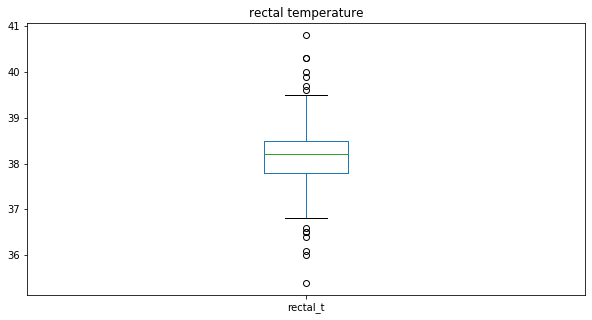

In [28]:
df.rectal_t.plot(kind='box', title='rectal temperature')

In [29]:
# Метрики: 
metrics(df.rectal_t)

Мин:  35.4
Макс:  40.8
Размах:  5.4
Среднее:  38.2
Мода (с округл.):  38.0
Мода (без округл.):  38.0
Медиана:  38.2
СКО:  0.7
Дисперсия:  0.5

Квантили:
0.25    37.8
0.50    38.2
0.75    38.5
Name: rectal_t, dtype: float64

Межквартильный размах:  0.7


In [30]:
# Дополнительно смотрю стандартные границы выбросов

box(df.rectal_t)

Мин. граница:  36.74999999999999
Макс. граница:  39.550000000000004


In [31]:
# Выбросы: Диапазон температур для лошади ~ 34 - 42 градуса.
# Я думаю, что выбросов здесь нет, все значения допутимы, поэтому ничего исправляю

In [32]:
# Пропуски: 20% - много. 
# Как и для всех признаков, имеющих дело с измерениями чего-либо, скорее всего эти измерения просто не делались. 
# Не для каждой лошади нужен полный набор анализов. И даже если делались, могли не записывать.

missing(df.rectal_t)

20.1%

False    239
True      60
Name: rectal_t, dtype: int64


In [33]:
# Варианты заполения:

#  - средняя температура по документации 37,8. Мне этот вариант не нравится, потому что мало ли что там написано)

#  - среднее, мода или медиана. Здесь между этими способами нет особой разницы, любой из вариантов минимально влияет
# на метрики (0,1 - 0,2 градуса). Например, медиана:

res = df.rectal_t.fillna(df.rectal_t.median())
metrics(res)

Мин:  35.4
Макс:  40.8
Размах:  5.4
Среднее:  38.2
Мода (с округл.):  38.0
Мода (без округл.):  38.2
Медиана:  38.2
СКО:  0.7
Дисперсия:  0.4

Квантили:
0.25    37.9
0.50    38.2
0.75    38.5
Name: rectal_t, dtype: float64

Межквартильный размах:  0.6


In [34]:
# или мода:

res = df.rectal_t.fillna(df.rectal_t.round().mode()[0])
metrics(res)

Мин:  35.4
Макс:  40.8
Размах:  5.4
Среднее:  38.1
Мода (с округл.):  38.0
Мода (без округл.):  38.0
Медиана:  38.0
СКО:  0.7
Дисперсия:  0.4

Квантили:
0.25    37.9
0.50    38.0
0.75    38.5
Name: rectal_t, dtype: float64

Межквартильный размах:  0.6


In [35]:
# Гипотеза 1 - столбец temperature of extremities (7) - температура конечностей, коррелирует с ректтальной температурой 
# hot extremities should correlate with an elevated rectal temp.
# Считаю, например, медиану для ректальной температуры в разрезе температуры конечностей - очень маленький разброс.

print(df.groupby('extremities_t').rectal_t.median())

extremities_t
1.0    38.15
2.0    38.20
3.0    38.10
4.0    38.35
Name: rectal_t, dtype: float64


In [36]:
# Гипотеза 2 - столбец age (2) - возможно, ректальная температура зависит от возраста
# Считаю, например, среднее - всё ещё маленький разброс.

print(df.groupby('age').rectal_t.mean())

age
1    38.122831
2    38.645000
Name: rectal_t, dtype: float64


In [37]:
# Так как все метрики дают +/- одинаковые значения, буду заполнять пропуски значением 38.2

df.rectal_t.fillna(38.2, inplace=True)

df[df.rectal_t.isnull()].head()

,surgery,age,hospital_number,rectal_t,pulse,respiratory_rate,extremities_t,peripheral_pulse,mucous_membranes,capillary_time,pain,peristalsis,abdominal_distension,nasogastric_tube,reflux,reflux_PH,rectal_examination,abdomen,packed_volume,total_protein,abdominocentesis_appearance,abdomcentesis_protein,outcome,surgical_lesion,lesion1,lesion2,lesion3,cp_data


##### Вывод: Большинство лошадей имеют ректальную температуру близкую к норме. Средняя температура у молодых лошадей на 0,5 градуса выше, чем у взрослых

### 5. pulse - пульс

Тип данных: дискретный

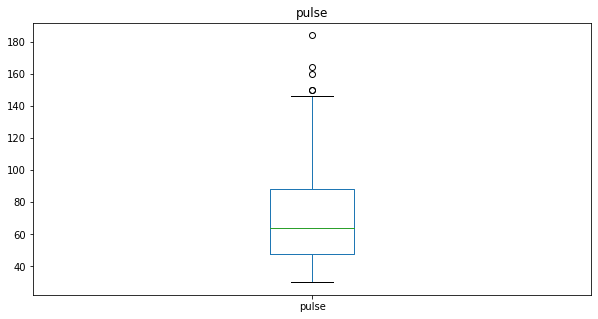

In [38]:
df.pulse.plot(kind='box', title='pulse')

In [39]:
# Метрики: 
metrics(df.pulse)

Мин:  30.0
Макс:  184.0
Размах:  154.0
Среднее:  71.9
Мода (с округл.):  48.0
Мода (без округл.):  48.0
Медиана:  64.0
СКО:  28.7
Дисперсия:  822.6

Квантили:
0.25    48.0
0.50    64.0
0.75    88.0
Name: pulse, dtype: float64

Межквартильный размах:  40.0


In [40]:
# Дополнительно смотрю стандартные границы выбросов

box(df.pulse)

Мин. граница:  -12.0
Макс. граница:  148.0


In [41]:
df[(df.pulse < -12) | (df.pulse > 148)].head(10)

,surgery,age,hospital_number,rectal_t,pulse,respiratory_rate,extremities_t,peripheral_pulse,mucous_membranes,capillary_time,pain,peristalsis,abdominal_distension,nasogastric_tube,reflux,reflux_PH,rectal_examination,abdomen,packed_volume,total_protein,abdominocentesis_appearance,abdomcentesis_protein,outcome,surgical_lesion,lesion1,lesion2,lesion3,cp_data
2,1,2,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,2.0,4.0,4.0,1.0,2.0,5.0,3.0,NaN,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
40,2,2,5288249,39.0,150.0,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,8.5,NaN,0.1,1.0,1,9400,0,0,1
54,1,2,5282839,38.6,160.0,20.0,3.0,NaN,5.0,1.0,3.0,3.0,4.0,3.0,NaN,NaN,4.0,NaN,38.0,NaN,2.0,NaN,2.0,1,7111,0,0,1
254,1,2,5294539,38.8,184.0,84.0,1.0,NaN,1.0,1.0,4.0,1.0,3.0,NaN,NaN,NaN,2.0,NaN,33.0,3.3,NaN,NaN,2.0,1,7111,0,0,2
274,1,2,5297159,38.8,150.0,50.0,1.0,3.0,6.0,2.0,5.0,3.0,2.0,1.0,1.0,NaN,NaN,NaN,50.0,6.2,NaN,NaN,2.0,1,4207,0,0,2


In [ ]:
# Выбросы: технически 5 лошадей с аномально высоким пульсом. По факту, мне кажется, что все значения допустимы. 
# Я бы удалила индекс 40, так как нет большей части измерений, остальное оставила
# Ещё интересный момент, что все "выбросы" имеют 7 цифр в hospital_number, может они так помечают сложные случаи..

In [42]:
# Пропуски: 8% - средне

missing(df.pulse)

8.0%

False    275
True      24
Name: pulse, dtype: int64


In [45]:
# Варианты заполения:

#  - среднее, мода или медиана. Здесь все метрики значительно выше значений по доке
# среднее

res = df.pulse.fillna(df.pulse.mean())
metrics(res)

Мин:  30.0
Макс:  184.0
Размах:  154.0
Среднее:  71.9
Мода (с округл.):  72.0
Мода (без округл.):  48.0
Медиана:  68.0
СКО:  27.5
Дисперсия:  756.3

Квантили:
0.25    48.0
0.50    68.0
0.75    88.0
Name: pulse, dtype: float64

Межквартильный размах:  40.0


In [46]:
# медиана

res = df.pulse.fillna(df.pulse.median())
metrics(res)

Мин:  30.0
Макс:  184.0
Размах:  154.0
Среднее:  71.3
Мода (с округл.):  64.0
Мода (без округл.):  64.0
Медиана:  64.0
СКО:  27.6
Дисперсия:  761.0

Квантили:
0.25    48.0
0.50    64.0
0.75    88.0
Name: pulse, dtype: float64

Межквартильный размах:  40.0


In [47]:
# мода:

res = df.pulse.fillna(df.rectal_t.round().mode()[0])
metrics(res)

Мин:  30.0
Макс:  184.0
Размах:  154.0
Среднее:  69.2
Мода (с округл.):  48.0
Мода (без округл.):  48.0
Медиана:  60.0
СКО:  29.0
Дисперсия:  841.6

Квантили:
0.25    48.0
0.50    60.0
0.75    88.0
Name: pulse, dtype: float64

Межквартильный размах:  40.0


In [48]:
# Гипотеза: Пульс повышается, когда есть проблемы с кровообращеинем.
# У нас есть сразу несколько столбцов, связанных с кровообращением:
    
# peripheral_pulse (переферический пульс). Если он снижен (3) или отстутствует, это указывает на плохую перфузию
# mucous_membranes (слизистые оболочки) Значения 4 - 6 указывают на проблемы с кровообращением
# capillary_time. Значение 2 => проблемы с кровообращением
# packed cell volume. Нормальное значение от 30 до 50, повышается при проблемах с кровообращением

# В учебных целях исследую первые 3

In [49]:
# Пульс действительно выше у лошадей с низким или отстутствующим переферическим пульсом

print(df.groupby('peripheral_pulse').pulse.mean())

peripheral_pulse
1.0    58.000000
2.0    59.200000
3.0    87.797872
4.0    91.428571
Name: pulse, dtype: float64


In [50]:
print(df.groupby('peripheral_pulse').pulse.median())

peripheral_pulse
1.0    52.0
2.0    60.0
3.0    88.0
4.0    88.0
Name: pulse, dtype: float64


In [51]:
# Пульс действительно выше у лошадей с ненормальными слизистыми (4 - 6)

print(df.groupby('mucous_membranes').pulse.mean())

mucous_membranes
1.0     56.766234
2.0     69.620690
3.0     69.588235
4.0     85.850000
5.0     83.440000
6.0    107.375000
Name: pulse, dtype: float64


In [52]:
print(df.groupby('mucous_membranes').pulse.median())

mucous_membranes
1.0     48.0
2.0     64.0
3.0     66.0
4.0     89.0
5.0     78.0
6.0    102.0
Name: pulse, dtype: float64


In [53]:
# Тут есть незадокументированное значение 3 (но оно встречается 2 раза и, скорее всего, является ошибкой, например, 2 и 3
# рядом на клавиатуре). Можно сказать, что когда capillary_time > 3 (значение 2) секунд, пульс выше

print(df.groupby('capillary_time').pulse.mean())

capillary_time
1.0    64.806630
2.0    91.111111
3.0    54.000000
Name: pulse, dtype: float64


In [ ]:
print(df.groupby('capillary_time').pulse.median())

In [59]:
# Буду заполнять пропуски медианными значениями с группировкой по переферическому пульсу и слизистым.

df.groupby(['peripheral_pulse', 'mucous_membranes']).pulse.median()

peripheral_pulse  mucous_membranes
1.0               1.0                  48.0
                  2.0                  56.0
                  3.0                  48.0
                  4.0                  45.0
                  5.0                  64.0
                  6.0                 164.0
2.0               1.0                  60.0
                  2.0                  54.0
                  3.0                  56.0
                  4.0                  72.0
3.0               1.0                  64.0
                  2.0                  73.0
                  3.0                  80.0
                  4.0                  96.0
                  5.0                 100.0
                  6.0                 108.0
4.0               3.0                  80.0
                  4.0                 116.0
                  5.0                  70.0
                  6.0                 100.0
Name: pulse, dtype: float64

In [60]:
df.pulse.fillna(df.groupby(['peripheral_pulse', 'mucous_membranes']).pulse.transform('median'), inplace=True)

missing(df.pulse)

3.0%

False    290
True       9
Name: pulse, dtype: int64


In [61]:
# Ещё остались 9 лошадей, для которых очень мало данных. Их, возможно, лучше вообще удалить из дата сета. 
# Пока заполняю медианой (64)

df.pulse.fillna(64, inplace=True)

df[df.pulse.isnull()].head()

,surgery,age,hospital_number,rectal_t,pulse,respiratory_rate,extremities_t,peripheral_pulse,mucous_membranes,capillary_time,pain,peristalsis,abdominal_distension,nasogastric_tube,reflux,reflux_PH,rectal_examination,abdomen,packed_volume,total_protein,abdominocentesis_appearance,abdomcentesis_protein,outcome,surgical_lesion,lesion1,lesion2,lesion3,cp_data


#### Вывод: Большинство болеющих лошадей имеют повышенный пульс, который свидетельствует о проблемах с кровообращением и зависит от переферического пульса, цвета слизистых и других параметров

### 6. respiratory_rate - частота дыхания 

    - linear
      - normal rate is 8 to 10
      - usefulness is doubtful due to the great fluctuations

Тип данных: дискретный

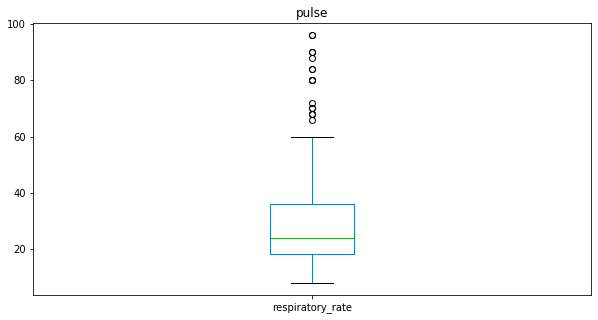

In [62]:
df.respiratory_rate.plot(kind='box', title='pulse')

In [63]:
# Метрики: 
metrics(df.respiratory_rate)

Мин:  8.0
Макс:  96.0
Размах:  88.0
Среднее:  30.4
Мода (с округл.):  20.0
Мода (без округл.):  20.0
Медиана:  24.0
СКО:  17.7
Дисперсия:  312.5

Квантили:
0.25    18.0
0.50    24.0
0.75    36.0
Name: respiratory_rate, dtype: float64

Межквартильный размах:  18.0


In [64]:
# Дополнительно смотрю стандартные границы выбросов

box(df.respiratory_rate)

Мин. граница:  -9.0
Макс. граница:  63.0


In [65]:
df[(df.respiratory_rate < -9) | (df.respiratory_rate > 63)].respiratory_rate.count()

17

In [66]:
df[(df.respiratory_rate < -9) | (df.respiratory_rate > 63)].head(20)

,surgery,age,hospital_number,rectal_t,pulse,respiratory_rate,extremities_t,peripheral_pulse,mucous_membranes,capillary_time,pain,peristalsis,abdominal_distension,nasogastric_tube,reflux,reflux_PH,rectal_examination,abdomen,packed_volume,total_protein,abdominocentesis_appearance,abdomcentesis_protein,outcome,surgical_lesion,lesion1,lesion2,lesion3,cp_data
2,1,2,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,2.0,4.0,4.0,1.0,2.0,5.0,3.0,NaN,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
38,1,2,5277409,39.2,146.0,96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1,2113,0,0,2
40,2,2,5288249,39.0,150.0,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,8.5,NaN,0.1,1.0,1,9400,0,0,1
81,1,2,5290759,38.1,100.0,80.0,3.0,1.0,2.0,1.0,3.0,4.0,1.0,NaN,NaN,NaN,1.0,NaN,36.0,5.7,NaN,NaN,1.0,1,3111,0,0,2
83,1,1,529849,37.8,60.0,80.0,1.0,3.0,2.0,2.0,2.0,3.0,3.0,NaN,2.0,5.5,4.0,NaN,40.0,4.5,2.0,NaN,1.0,1,5206,0,0,1
102,1,2,5292489,38.0,140.0,68.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,NaN,NaN,NaN,2.0,1.0,39.0,5.3,NaN,NaN,1.0,1,7111,0,0,2
105,1,1,528668,38.3,52.0,96.0,NaN,3.0,3.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,43.0,6.1,NaN,NaN,1.0,1,3209,0,0,1
119,1,1,528682,39.4,54.0,66.0,1.0,1.0,2.0,1.0,2.0,3.0,2.0,1.0,1.0,NaN,3.0,4.0,39.0,6.0,2.0,NaN,1.0,1,2206,0,0,1
124,1,1,528461,38.0,42.0,68.0,4.0,1.0,1.0,1.0,3.0,3.0,2.0,2.0,2.0,NaN,4.0,4.0,41.0,7.6,NaN,NaN,1.0,1,2205,0,0,2
185,1,1,5278331,39.3,64.0,90.0,2.0,3.0,1.0,1.0,NaN,3.0,1.0,1.0,2.0,NaN,NaN,NaN,39.0,6.7,NaN,NaN,1.0,1,21110,0,0,2


Выбросы: 17 лошадей с аномально высокой частотой дыхания. Стратегия может быть следующая(по условию задания ничего не удаляю):
- удалить строки, где отстутствует большая часть измерений. Например 38, 40, 228. Даже если это не выбросы, будет сложно
построить какие-то зависимости без доп. данных
- не считать выбросами строки с age = 2, так как у молодых лошадей может быть высокая частота дыхания
- считать выбросами всё, что выше 80 (3 случая). Судя по графику и данным из гугла, такие значения возможны, но сомнительны.
- что с ними делать. Мне кажется, ничего. Значения из других столбцов у этих случаев похожи, возможно, это какая-то клиническая картина. Максимум заменить на верхнее значение (80), среднее упадёт, но не так сильно

In [67]:
df[((df.respiratory_rate < -9) | (df.respiratory_rate > 80)) & (df.isnull().sum(axis=1) < 9)  & (df.age != 2)].head(20)

,surgery,age,hospital_number,rectal_t,pulse,respiratory_rate,extremities_t,peripheral_pulse,mucous_membranes,capillary_time,pain,peristalsis,abdominal_distension,nasogastric_tube,reflux,reflux_PH,rectal_examination,abdomen,packed_volume,total_protein,abdominocentesis_appearance,abdomcentesis_protein,outcome,surgical_lesion,lesion1,lesion2,lesion3,cp_data
105,1,1,528668,38.3,52.0,96.0,NaN,3.0,3.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,43.0,6.1,NaN,NaN,1.0,1,3209,0,0,1
185,1,1,5278331,39.3,64.0,90.0,2.0,3.0,1.0,1.0,NaN,3.0,1.0,1.0,2.0,NaN,NaN,NaN,39.0,6.7,NaN,NaN,1.0,1,21110,0,0,2
268,1,1,527883,39.3,64.0,90.0,2.0,3.0,1.0,1.0,NaN,3.0,1.0,1.0,2.0,6.5,1.0,5.0,39.0,6.7,NaN,NaN,1.0,1,31110,0,0,2


In [68]:
# Пропуски: 19.4% - много. 

missing(df.respiratory_rate)

19.4%

False    241
True      58
Name: respiratory_rate, dtype: int64


In [69]:
# Так как признак имеет большие колебания и, возможно, не очень точно измеряется, буду просто заполнять модой (20)

# Буду заполнять модой (3)

df.respiratory_rate.fillna(20, inplace=True)

df[df.respiratory_rate.isnull()].head()

,surgery,age,hospital_number,rectal_t,pulse,respiratory_rate,extremities_t,peripheral_pulse,mucous_membranes,capillary_time,pain,peristalsis,abdominal_distension,nasogastric_tube,reflux,reflux_PH,rectal_examination,abdomen,packed_volume,total_protein,abdominocentesis_appearance,abdomcentesis_protein,outcome,surgical_lesion,lesion1,lesion2,lesion3,cp_data


##### Вывод: Частота дыхания у большинства болеющих лошадей повышена, но данный признак является спорным и вряд ли может использоваться для исследования 

### 7. temperature of extremities - температура конечностей

      - a subjective indication of peripheral circulation
      - possible values:
           1 = Normal
           2 = Warm
           3 = Cool
           4 = Cold
      - cool to cold extremities indicate possible shock
      - hot extremities should correlate with an elevated rectal temp.

Тип данных: порядковый

In [70]:
# Проверяю, какие есть значения 
unique(df.extremities_t)

Уникальные значения:  [nan, 1.0, 4.0, 2.0, 3.0]


In [71]:
# Для удобства привожу к int64
df.extremities_t = df.extremities_t.astype('Int64')

df.head()

,surgery,age,hospital_number,rectal_t,pulse,respiratory_rate,extremities_t,peripheral_pulse,mucous_membranes,capillary_time,pain,peristalsis,abdominal_distension,nasogastric_tube,reflux,reflux_PH,rectal_examination,abdomen,packed_volume,total_protein,abdominocentesis_appearance,abdomcentesis_protein,outcome,surgical_lesion,lesion1,lesion2,lesion3,cp_data
0,1,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,3.0,4.0,2.0,NaN,NaN,NaN,4.0,2.0,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
1,2,1,530334,38.3,40.0,24.0,1,1.0,3.0,1.0,3.0,3.0,1.0,NaN,NaN,NaN,1.0,1.0,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
2,1,2,5290409,39.1,164.0,84.0,4,1.0,6.0,2.0,2.0,4.0,4.0,1.0,2.0,5.0,3.0,NaN,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
3,2,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2
4,2,1,528355,38.2,48.0,20.0,2,1.0,3.0,1.0,2.0,3.0,2.0,2.0,1.0,NaN,3.0,3.0,NaN,NaN,NaN,NaN,1.0,2,0,0,0,2


In [72]:
# Метрики:
moda(df.extremities_t)

Мода (без округл.):  3
3    108
1     78
2     30
4     27
Name: extremities_t, dtype: int64


In [73]:
# Выбросы: нет

# Пропуски: 18.7% - много
missing(df.extremities_t)

18.7%

False    243
True      56
Name: extremities_t, dtype: int64


In [74]:
# Варианты заполнения:
# При исследовании ректальной температуры, мы уже выяснили, что связь с температурой конечностей если и есть, то на более
# сложном уровне. Кроме того, температру конечностей - признак субъективный, который может зависеть от большого кол-ва факторов
# (кто, где, когда измерял и т.п.)

# Буду заполнять модой (3)

df.extremities_t.fillna(3, inplace=True)

df[df.extremities_t.isnull()].head()

,surgery,age,hospital_number,rectal_t,pulse,respiratory_rate,extremities_t,peripheral_pulse,mucous_membranes,capillary_time,pain,peristalsis,abdominal_distension,nasogastric_tube,reflux,reflux_PH,rectal_examination,abdomen,packed_volume,total_protein,abdominocentesis_appearance,abdomcentesis_protein,outcome,surgical_lesion,lesion1,lesion2,lesion3,cp_data


##### Вывод: Около 80% болеющих лошадей имели нормальную или прохладную температуру конечностей

### 8. peripheral pulse - периферический пульс

      - subjective
      - possible values are:
           1 = normal
           2 = increased
           3 = reduced
           4 = absent
      - normal or increased p.p. are indicative of adequate circulation
        while reduced or absent indicate poor perfusion

Тип данных: порядковый?

In [75]:
# Проверяю, какие есть значения 
unique(df.peripheral_pulse)

Уникальные значения:  [nan, 1.0, 4.0, 3.0, 2.0]


In [76]:
# Для удобства привожу к int64
df.peripheral_pulse = df.peripheral_pulse.astype('Int64')

df.head()

,surgery,age,hospital_number,rectal_t,pulse,respiratory_rate,extremities_t,peripheral_pulse,mucous_membranes,capillary_time,pain,peristalsis,abdominal_distension,nasogastric_tube,reflux,reflux_PH,rectal_examination,abdomen,packed_volume,total_protein,abdominocentesis_appearance,abdomcentesis_protein,outcome,surgical_lesion,lesion1,lesion2,lesion3,cp_data
0,1,1,534817,39.2,88.0,20.0,3,NaN,4.0,1.0,3.0,4.0,2.0,NaN,NaN,NaN,4.0,2.0,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
1,2,1,530334,38.3,40.0,24.0,1,1,3.0,1.0,3.0,3.0,1.0,NaN,NaN,NaN,1.0,1.0,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
2,1,2,5290409,39.1,164.0,84.0,4,1,6.0,2.0,2.0,4.0,4.0,1.0,2.0,5.0,3.0,NaN,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
3,2,1,530255,37.3,104.0,35.0,3,NaN,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2
4,2,1,528355,38.2,48.0,20.0,2,1,3.0,1.0,2.0,3.0,2.0,2.0,1.0,NaN,3.0,3.0,NaN,NaN,NaN,NaN,1.0,2,0,0,0,2


In [77]:
# Метрики:
moda(df.peripheral_pulse)

Мода (без округл.):  1
1    115
3    102
4      8
2      5
Name: peripheral_pulse, dtype: int64


In [78]:
# Выбросы: нет

In [79]:
# Пропуски: 23.1% - много
missing(df.peripheral_pulse)

23.1%

False    230
True      69
Name: peripheral_pulse, dtype: int64


In [80]:
# Варианты заполнения:
# При исследовании пульса мы выяснили, что есть обратная корреляция с переферическим пульсом
# Так как подавляющее больинство значений для переферического пульса 1 и 3, буду заполнять по схеме:
# - если пульс меньше 65, то 1, если больше, то 3

df.loc[df.peripheral_pulse.isnull() & (df.pulse < 65), 'peripheral_pulse'] = 1
df.loc[df.peripheral_pulse.isnull() & (df.pulse > 64), 'peripheral_pulse'] = 3

df[df.peripheral_pulse.isnull()].head(50)

,surgery,age,hospital_number,rectal_t,pulse,respiratory_rate,extremities_t,peripheral_pulse,mucous_membranes,capillary_time,pain,peristalsis,abdominal_distension,nasogastric_tube,reflux,reflux_PH,rectal_examination,abdomen,packed_volume,total_protein,abdominocentesis_appearance,abdomcentesis_protein,outcome,surgical_lesion,lesion1,lesion2,lesion3,cp_data


#### Вывод: Большинство болеющих лошадей имеют нормальный или пониженный переферический пульс. Пониженный пульс связан с проблемами с кровообращением.

In [86]:
# Итого

df.iloc[:, 0:8].head(20)

,surgery,age,hospital_number,rectal_t,pulse,respiratory_rate,extremities_t,peripheral_pulse
0,1,1,534817,39.2,88.0,20.0,3,3
1,2,1,530334,38.3,40.0,24.0,1,1
2,1,2,5290409,39.1,164.0,84.0,4,1
3,2,1,530255,37.3,104.0,35.0,3,3
4,2,1,528355,38.2,48.0,20.0,2,1
5,1,1,526802,37.9,48.0,16.0,1,1
6,1,1,529607,38.2,60.0,20.0,3,1
7,2,1,530051,38.2,80.0,36.0,3,4
8,2,2,5299629,38.3,90.0,20.0,1,3
9,1,1,528548,38.1,66.0,12.0,3,3
